Fitting with user-defined functions
===

There are numerous ways to express functions in ROOT (https://root.cern.ch/doc/master/classTF1.html) in this example we'll explore a general method of defining fit functions.  Again we will use the ROOT fitting framework for the next couple of exercies to illustrate some general featues of the non-linear fitting problems.  Some of the examples we see may be replicated in scipy.optimize, but not neceassarily all of them.

In [1]:
import ROOT as r

Welcome to JupyROOT 6.24/02


First we define a function and store it in a TF1 object.  In this example we will use Pythonic interfaces, next time we'll see the same patterns can be used in C++.

In [2]:
from math import pow, exp

# A function producing two peaks on top of an exponentialy 
# falling background.  Depends on several parameters.
# Generic interface for fcn of n input-values and m parameters
# Functions with this interface may be used to construct a "TFunction" or TF1
# vx is the independent value(s): array like
# p is the parameter value(s): array like

def myfunction(vx, par):
    x=vx[0]  # this is a 1D function
    bkgScale=par[0]
    alpha=par[1]
    beta=par[2]
    background = pow(x/beta,-1.0*alpha)
    # first peak
    A1=par[3]
    mu1=par[4]
    sig1=par[5]
    peak1=A1*exp(-0.5*(x-mu1)*(x-mu1)/sig1/sig1)
    # second peak
    A2=par[6]
    mu2=par[7]
    sig2=par[8]
    peak2=A2*exp(-0.5*(x-mu2)*(x-mu2)/sig2/sig2)
    return bkgScale*background+peak1+peak2

range=(300,1000)
f1 = r.TF1("f1",myfunction,range[0],range[1],9)  # range 300<=x<=1000, there are 9 parameters in this function
f1.SetNpx(500)  # use large number of points in drawing function to resolve small details better
f1.SetParameters(1e9,4.7,40,5000,490,2,1200,800,25)  # define the parameters
f1.SetParNames("BkgScale","alpha","beta","A1","mu1","sig1","A2","mu2","sig2")  # optional, but nice

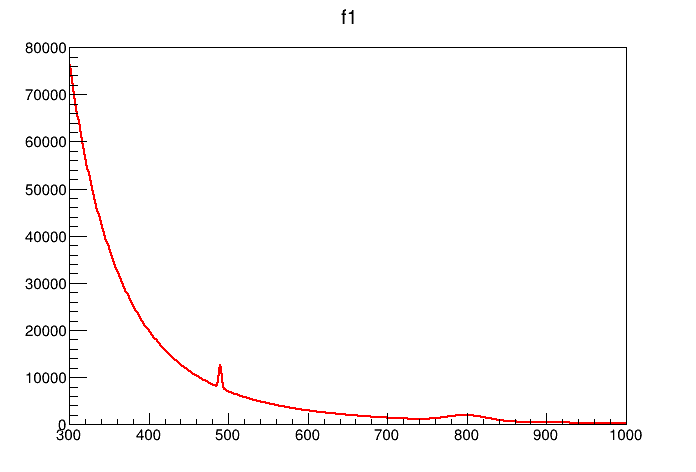

In [3]:
tc=r.TCanvas()
f1.Draw()
tc.Draw()

Generate random data according to this distribution

In [4]:
entries=100000
ranHist1 = r.TH1F("ranHist1", "Random Histogram for my PDF;x;entries",500,range[0],range[1]);
ranHist1.FillRandom("f1",entries)

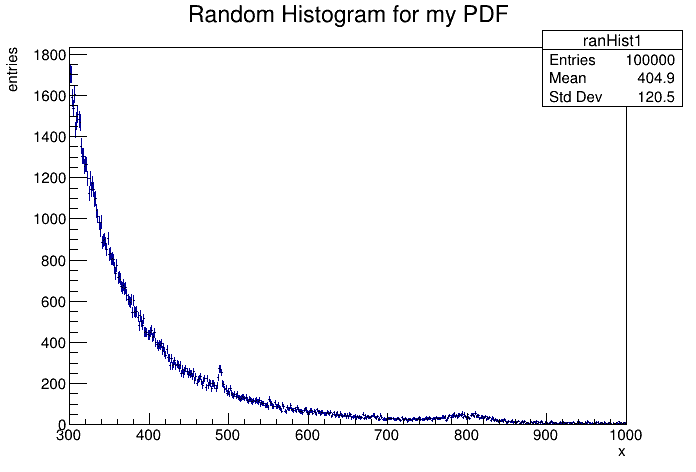

In [5]:
ranHist1.Draw("e")
tc.Draw()

 Now "pretend" that we don't know the paramaters used to generate the data.
 
 All fits begin with initial guesses at the best parameter values

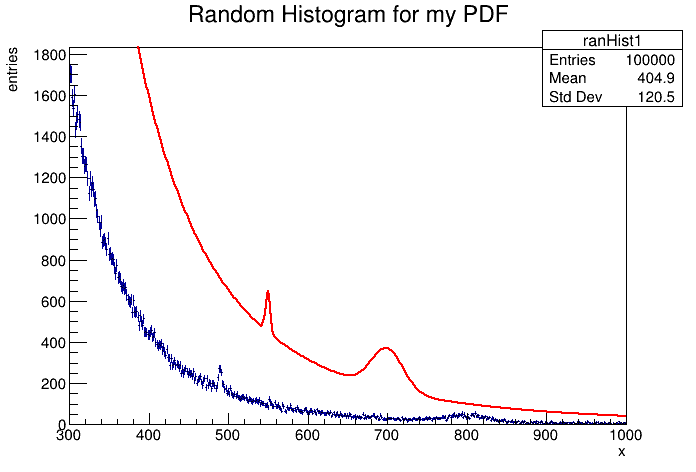

In [6]:
f1.SetParameters(1e6,4,80,200,550,3,200,700,20)
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

To get better qualitative agreement try:

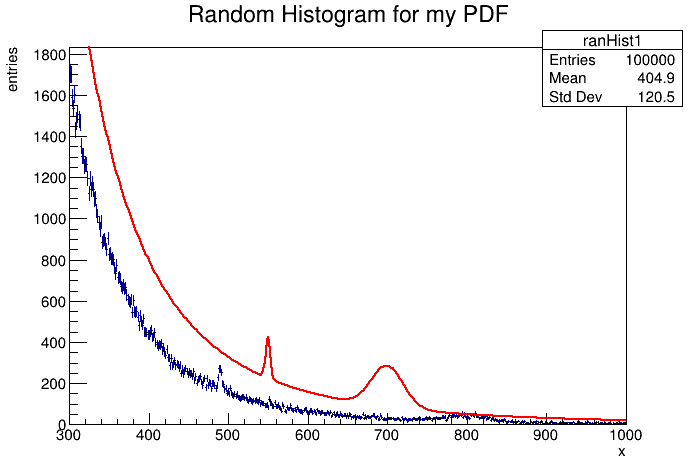

In [7]:
f1.SetParameters(0.5e6,4,80,200,550,3,200,700,20)
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

Try to fit the function to the data:

In [8]:
result=ranHist1.Fit(f1,"S")
f1=ranHist1.GetFunction("f1")

 FCN=1213.1 FROM MIGRAD    STATUS=CONVERGED    1771 CALLS        1772 TOTAL
                     EDM=1.41316e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  BkgScale     6.98854e+05   1.41421e+00   3.53502e+01  -6.64146e-07
   2  alpha        4.67189e+00   1.82496e-02   3.46951e-05   7.62184e-01
   3  beta         8.28419e+01   4.82737e-01   9.60852e-04  -2.61749e-02
   4  A1           3.69591e+02   1.41421e+00   1.02535e+08   4.73082e-11
   5  mu1          5.45961e+02   1.37004e+00   6.54052e-02  -3.05018e-06
   6  sig1        -3.92608e-02   1.38291e+00   3.68349e-03  -1.97367e-05
   7  A2           2.08554e-01   3.23365e-01   3.76001e-03  -2.70674e-03
   8  mu2          4.52261e+02   1.41421e+00   7.62250e+01   1.48257e-04
   9  sig2        -2.32383e+03   1.41421e+00   6.37532e+01  -6.63219e-05


Look at the result:

chi^2: 1213.0991801361376, nDOF: 491, p-value: 7.420126378872865e-63


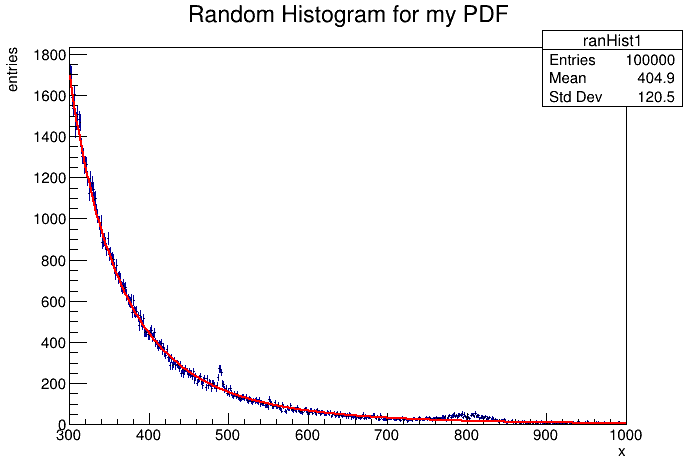

In [9]:
#%jsroot on
print(f'chi^2: {f1.GetChisquare()}, nDOF: {f1.GetNDF()}, p-value: {f1.GetProb()}')
ranHist1.Draw("e")
f1.Draw("same")
tc.Draw()

Did the fit work? Did it find both peaks? Probably not. In general, you can't count on complex fits to converge without carefully adjusting the starting parameters. Sure, in this example, you could peek at the parameters used to generate the data, but that's not an option in the real world. Go through the process of adjusting the parameters and replotting the function to get a better representation of the data. Then try a fit and see if you can extract find the parameters describing the peeks.

For you to try
===
The file datadist.root you will find a histogram representing data from an unknown distribution.

* Develop your own fitting function/model and see how well you can fit this distribution. 
* You may need to try a variety of functions.
* Include a plot of your best fit at the bottom of this notebook.
* Include your p-value for the best fit and describe how you settled on this fit versus others. 


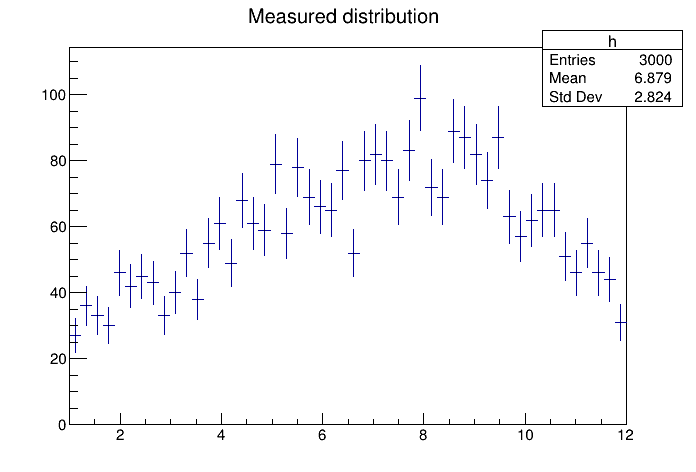

In [10]:
tf=r.TFile("datadist.root")
hist=tf.Get("h")
tc=r.TCanvas()
hist.Draw()
tc.Draw()